# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyboardInterrupt: 

## Part 2: Implement SVD for Dimensionality Reduction

In [6]:
def apply_svd_custom(X_train, X_test, n_components):
    # Center the data
    X_train_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_train_mean
    X_test_centered = X_test - X_train_mean  # Use the same mean to center test data
    
    # Compute the covariance matrix
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)
    
    # Eigen decomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select top n_components eigenvectors
    principal_components = sorted_eigenvectors[:, :n_components]
    
    # Project the data onto the reduced eigenspace
    X_train_svd = np.dot(X_train_centered, principal_components)
    X_test_svd = np.dot(X_test_centered, principal_components)
    
    return X_train_svd, X_test_svd, principal_components


## Part 3: Train Logistic Regression and Measure Performance

In [7]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [8]:
svd_components = [10, 20, 30, 50, 100]  # Different SVD dimensions to try

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, _ = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append((n_components, accuracy, training_time))
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")



Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


C:\Users\huang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 0.8267 seconds
Applying custom SVD with 20 components...


C:\Users\huang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8784, Training time: 2.0968 seconds
Applying custom SVD with 30 components...


C:\Users\huang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 30, Accuracy: 0.8922, Training time: 4.7151 seconds
Applying custom SVD with 50 components...


C:\Users\huang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 8.8298 seconds
Applying custom SVD with 100 components...


C:\Users\huang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 27.6458 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


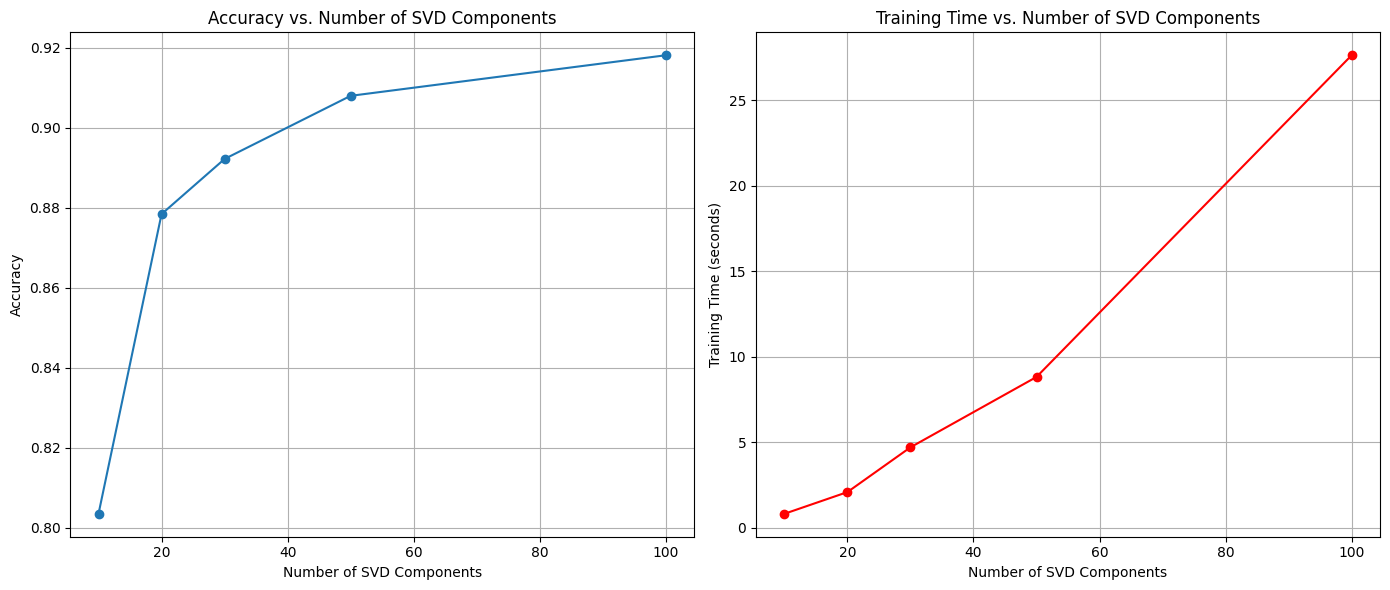

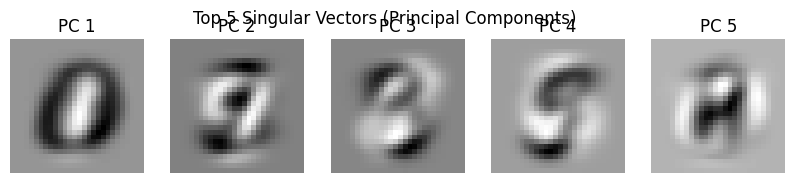

In [9]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Extract results for plotting
components, accuracies, times = zip(*results)

# Plot accuracy vs. number of SVD components
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of SVD Components')
plt.grid(True)

# Plot training time vs. number of SVD components
plt.subplot(1, 2, 2)
plt.plot(components, times, marker='o', color='red')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of SVD Components')
plt.grid(True)

plt.tight_layout()
plt.show()
# Visualize top 5 singular vectors
plt.figure(figsize=(10, 2))

# Reshape the top 5 principal components to 28x28 for visualization
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(_.T[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'PC {i+1}')

plt.suptitle('Top 5 Singular Vectors (Principal Components)')
plt.show()


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

The accuracy improves quickly as you add more dimensions in early stages, as these components capture the most variance. However, after a certain point, the accuracy growth may plateau. As the number of SVD components increases, the training time also increases, so there is a balance to be found between number of components and model performance.
Personally I think 50 SVD components is best here since it has good accuracy (over 90%), and it also has decent model performance, after that the gain in accuracy costs model performance too much.

The first few principal components capture the major structures in the image, in this case the first one is clearly a zero, while later components tend to capture finer details or noise.